In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\husna\OneDrive\Desktop\Machine learning\supervised learning\Desition tree\classification\EmployeeAttrition_DTC.csv')


In [3]:
df

,Age,Salary,YearsAtCompany,WorkLoad,Satisfaction,Attrition
0,59,77163,11.48,6.58,9.84,0
1,35,61411,3.31,5.17,6.13,1
2,53,65096,3.69,3.40,4.87,0
3,27,99617,7.78,4.98,2.31,0
4,22,61331,10.11,6.11,5.03,1
...,...,...,...,...,...,...
255,43,26518,11.36,2.45,3.26,1
256,51,34395,10.62,9.78,1.32,1
257,27,94001,0.42,5.75,1.12,1
258,24,53089,0.48,8.51,2.95,1


In [4]:
x=df.drop(columns=['Attrition'])
y=df['Attrition']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=4,        # control complexity (you can tune this)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [7]:
y_pred = clf.predict(x_test)


In [8]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

In [9]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7307692307692307

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.71      0.77      0.74        26

    accuracy                           0.73        52
   macro avg       0.73      0.73      0.73        52
weighted avg       0.73      0.73      0.73        52



In [10]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 8, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1, 2, 4, 6]
}

# 5. Set up GridSearchCV
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,          # use all CPU cores
    error_score="raise" # or "ignore" if you want to silence errors
)

# 6. Fit GridSearchCV
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.7556329849012775


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="entropy",   # or "entropy"
    max_depth=8,        # control complexity (you can tune this)
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [12]:
y_pred = clf.predict(x_test)


In [13]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.74      0.77      0.75        26

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



In [14]:


# 7. Use the best model
best_model = grid.best_estimator_

# 8. Predict on test data
y_pred = best_model.predict(x_test)

# 9. Evaluation on test set
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nTest Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=[0, 1],
    target_names=["Rejected", "Approved"],
    zero_division=0
))


Test Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.76      0.73      0.75        26
    Approved       0.74      0.77      0.75        26

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



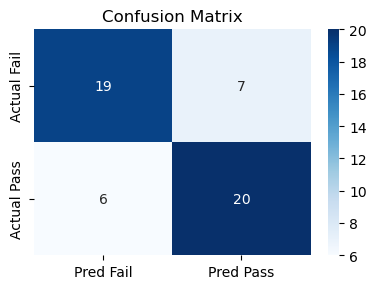

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Fail", "Pred Pass"],
            yticklabels=["Actual Fail", "Actual Pass"])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [16]:
df

,Age,Salary,YearsAtCompany,WorkLoad,Satisfaction,Attrition
0,59,77163,11.48,6.58,9.84,0
1,35,61411,3.31,5.17,6.13,1
2,53,65096,3.69,3.40,4.87,0
3,27,99617,7.78,4.98,2.31,0
4,22,61331,10.11,6.11,5.03,1
...,...,...,...,...,...,...
255,43,26518,11.36,2.45,3.26,1
256,51,34395,10.62,9.78,1.32,1
257,27,94001,0.42,5.75,1.12,1
258,24,53089,0.48,8.51,2.95,1


In [19]:
a=np.array([[
    32,
    100000,
    4,
    9,
    2.34
]])
clf.predict(a)

c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])